<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("rafalib")
install.packages("effsize")
install.packages("BSDA")
install.packages("pwr")
library(dplyr)
library(rafalib)
library(effsize)
library(BSDA)
library(pwr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




In [3]:
set.seed(4 )
samp <- rnorm(50,7,3)
samp

[1]  7.650265  5.372522  9.673434  8.787942 11.906854  9.067826  3.156260
 [8]  6.360566 12.689620 12.330590  8.699813  7.047158  8.149172  6.864589
[15]  7.103056  7.507080 10.495081  6.867388  6.698895  6.149666 11.622445
[22]  7.495507 10.922867 10.864771  8.778691  6.151169 10.767652  9.729517
[29]  4.215916 10.720543  7.460393 10.155798  4.737366  2.553433  9.583396
[36]  5.786441  6.317784  9.802289  5.602312  5.087370 11.031126  7.544606
[43] 10.877537  1.935854  4.537019  4.413562  7.296531  5.873035  9.171712
[50]  1.607854

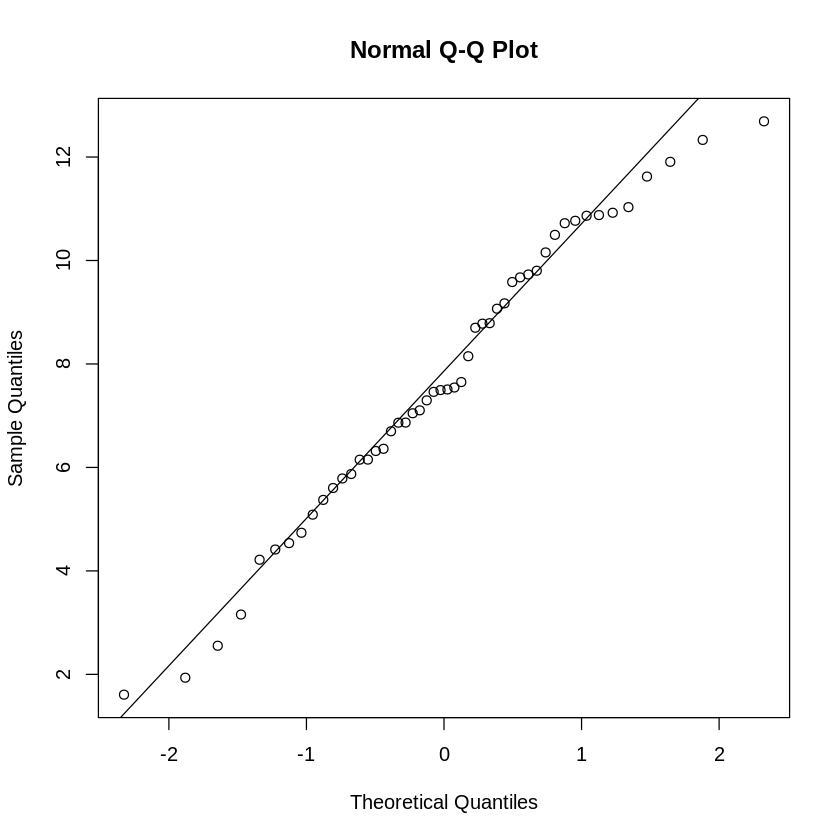

In [4]:
qqnorm(samp)
qqline(samp)

In [5]:
Z <- qnorm(0.975) # 95% CI #находим z-критерий для 95% дов.интервала
Z

[1] 1.959964

In [6]:
SE <- 3/sqrt(50) #стандартная ошибка средняя
SE

[1] 0.4242641

In [7]:
lolv <- mean(samp) - 2*SE
uplv <- mean(samp) + 2*SE
CI <- c(lolv,uplv)
CI  # уровни ДИ

[1] 6.855917 8.552974

In [8]:
7 >= CI[1] & 7 <= CI[2] # среднее ариф. ГС попадает в 95% ДИ

[1] TRUE

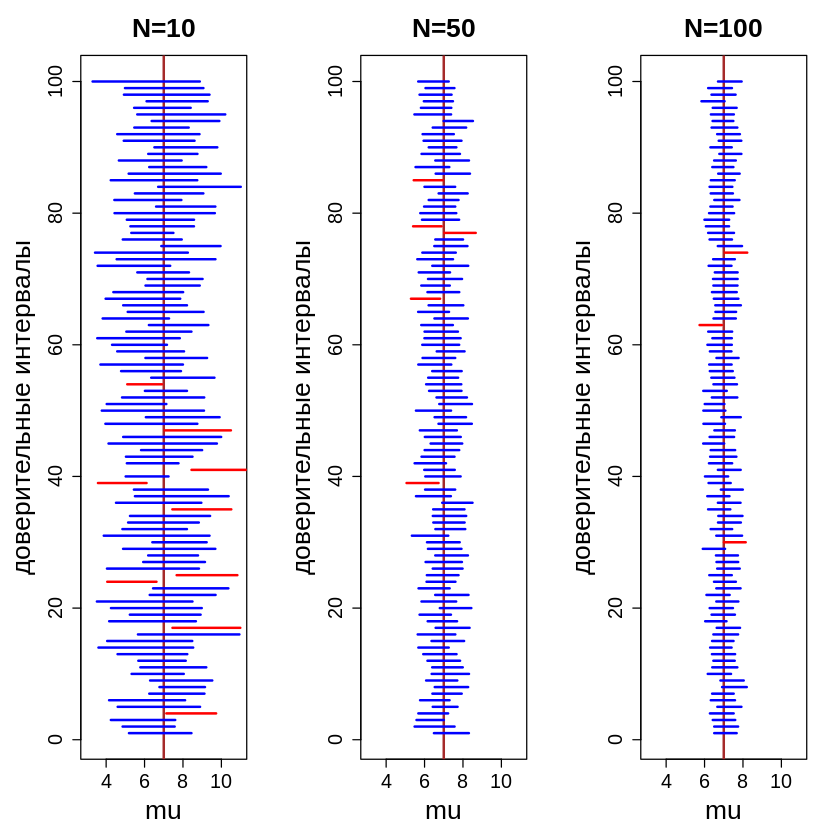

In [9]:
# возьмем Z критерий и 95% ДИ, увеличивая выборку. С увелечением размера выборка, увеличивается кол-во захвата интервалов истинным Мат.Ожиданием ГС
bigpar(1,3)
set.seed(3)

plot(7 + c(-4,4), c(1,1), type="n", xlab="mu", ylab="доверительные интервалы", ylim=c(1,100), main="N=10")
abline(v=7, col="brown", lwd=2)
for (i in 1:100) {
    sam <- rnorm(10,7,3)
    SE <- sd(sam)/sqrt(10)
    CI <- c(mean(sam)-Z*SE, mean(sam)+2*SE)
    catch <- 7 >= CI[1] & 7 <= CI[2]
    color <- ifelse(catch, "blue", "red")
    lines(CI, c(i,i), col=color, lwd=2)
}

plot(7 + c(-4,4), c(1,1), type="n", xlab="mu", ylab="доверительные интервалы", ylim=c(1,100), main="N=50")
abline(v=7, col="brown", lwd=2)
for (i in 1:100) {
    sam <- rnorm(50,7,3)
    SE <- sd(sam)/sqrt(50)
    CI <- c(mean(sam)-Z*SE, mean(sam)+2*SE)
    catch <- 7 >= CI[1] & 7 <= CI[2]
    color <- ifelse(catch, "blue", "red")
    lines(CI, c(i,i), col=color, lwd=2)
}

plot(7 + c(-4,4), c(1,1), type="n", xlab="mu", ylab="доверительные интервалы", ylim=c(1,100), main="N=100")
abline(v=7, col="brown", lwd=2)
for (i in 1:100) {
    sam <- rnorm(100,7,3)
    SE <- sd(sam)/sqrt(100)
    CI <- c(mean(sam)-Z*SE, mean(sam)+2*SE)
    catch <- 7 >= CI[1] & 7 <= CI[2]
    color <- ifelse(catch, "blue", "red")
    lines(CI, c(i,i), col=color, lwd=2)
}

In [10]:
# T-распределение

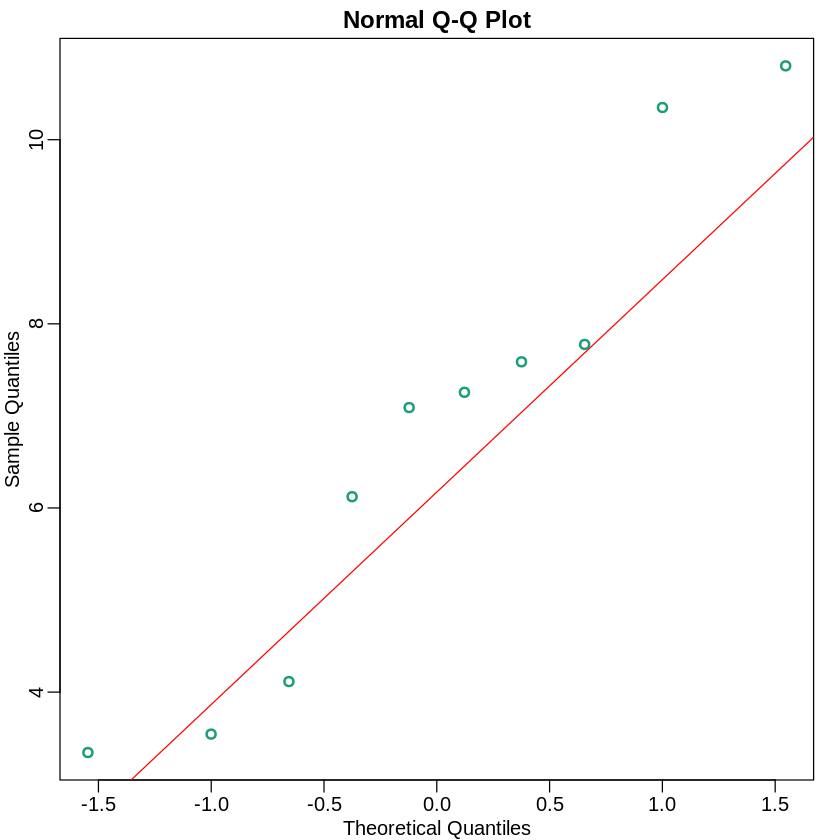

In [11]:
set.seed(3) #проврим данные на нормальность распределения

sam <- rnorm(10,7,3)
mypar(1,1)
qqnorm(sam, col=1, lwd=2)
qqline(sam, col="red")

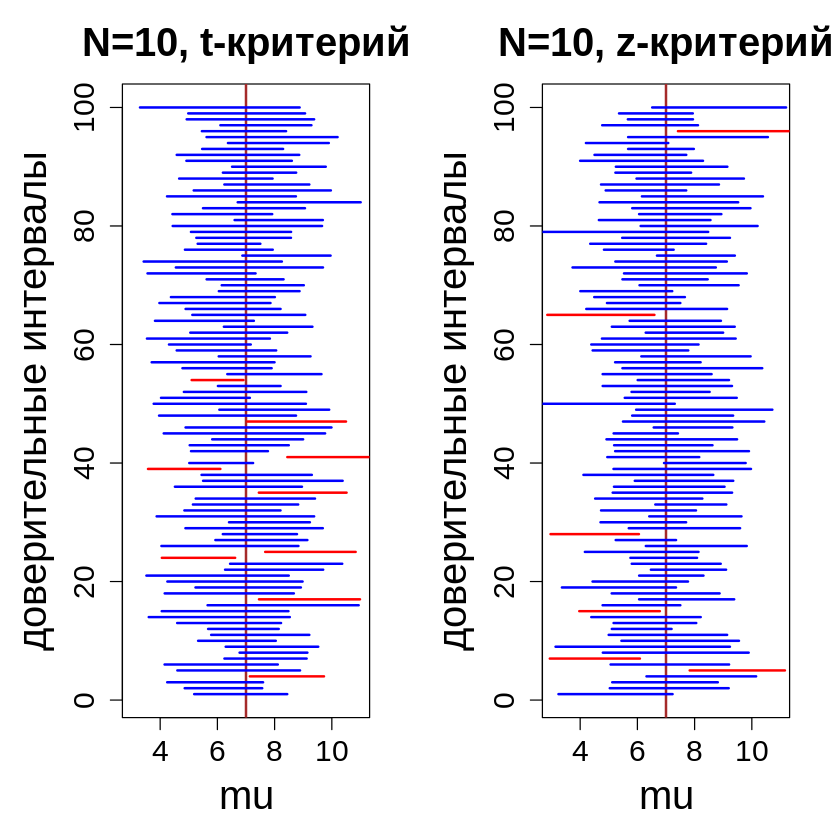

In [12]:
bigpar(1,2)
set.seed(3)
t <- qt(0.975, 9)

plot(7 + c(-4,4), c(1,1), type="n", xlab="mu", ylab="доверительные интервалы", ylim=c(1,100), main="N=10, t-критерий")
abline(v=7, col="brown", lwd=2)
for (i in 1:100) {
    sam <- rnorm(10,7,3)
    SE <- sd(sam)/sqrt(10)
    CI <- c(mean(sam)-Z*SE, mean(sam)+2*SE)
    catch <- 7 >= CI[1] & 7 <= CI[2]
    color <- ifelse(catch, "blue", "red")
    lines(CI, c(i,i), col=color, lwd=2)
}

plot(7 + c(-4,4), c(1,1), type="n", xlab="mu", ylab="доверительные интервалы", ylim=c(1,100), main="N=10, z-критерий")
abline(v=7, col="brown", lwd=2)
for (i in 1:100) {
    sam <- rnorm(10,7,3)
    SE <- sd(sam)/sqrt(10)
    CI <- c(mean(sam)-Z*SE, mean(sam)+2*SE)
    catch <- 7 >= CI[1] & 7 <= CI[2]
    color <- ifelse(catch, "blue", "red")
    lines(CI, c(i,i), col=color, lwd=2)
}

In [14]:
cat(Z,t) #Z, t критерий

1.959964 2.262157

In [15]:
c(mean(sam)-Z*SE, mean(sam)+Z*SE) #ДИ с Z критерием

[1]  6.517155 11.148424

In [16]:
c(mean(sam)-t*SE, mean(sam)+t*SE) #ДИ с t критерием, интервал шире.

[1]  6.160124 11.505456

In [21]:
library(httr)
# Скачаем файл "cardio_train.csv"
filename <- "cardio_train.csv"
url <- "https://drive.google.com/uc?authuser=0&id=1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP&export=download"
GET(url, write_disk(filename, overwrite=TRUE))

Response [https://doc-00-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ko3rnl51fqehfuvf3p0v65ble6tahvot/1687782525000/16531863302665455688/*/1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP?e=download&uuid=c53a0b60-f48d-4798-b6ca-b205ca8f687b]
  Date: 2023-06-26 12:29
  Status: 200
  Content-Type: text/csv
  Size: 2.94 MB
<ON DISK>  /content/cardio_train.csvNULL

In [22]:
df <- read.csv(filename, sep=";")
head(df, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1


In [25]:
df <- df %>% mutate(age_years=trunc(age/365))
head(df)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,60


In [26]:
tidy_set <- df %>% filter((ap_lo<200 & ap_lo > 20) & (ap_hi<300 & ap_hi>40))
head(tidy_set)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,60


In [27]:
head(tidy_set[tidy_set$ap_hi < tidy_set$ap_lo,])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
469,681,19099,1,156,65,120,150,2,1,0,0,1,0,52
628,913,20457,2,169,68,70,110,1,1,0,0,1,0,56
2342,3356,23361,1,154,102,90,150,1,1,0,0,0,1,64
2931,4214,21957,2,182,90,80,140,3,3,0,0,1,1,60
3383,4880,19992,2,180,80,80,125,3,3,1,1,1,1,54
3556,5130,21874,1,160,83,80,120,1,1,0,0,1,0,59


In [28]:
tidy_set_ <- tidy_set[tidy_set$ap_hi > tidy_set$ap_lo,] #сделаем выборку, когла верхнее АД больше нижнего, что яв-ся нормой
dim(tidy_set_)
dim(tidy_set)
women_ <- tidy_set_$ap_lo[tidy_set_$gender==1] #создадим выборку для женщин с данным по нижнему АД
men_ <- tidy_set_$ap_lo[tidy_set_$gender==2] #создадим выборку для мужчин с данными по нижнему АД

[1] 68678    14

[1] 68781    14

In [30]:
head(tidy_set_)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,60


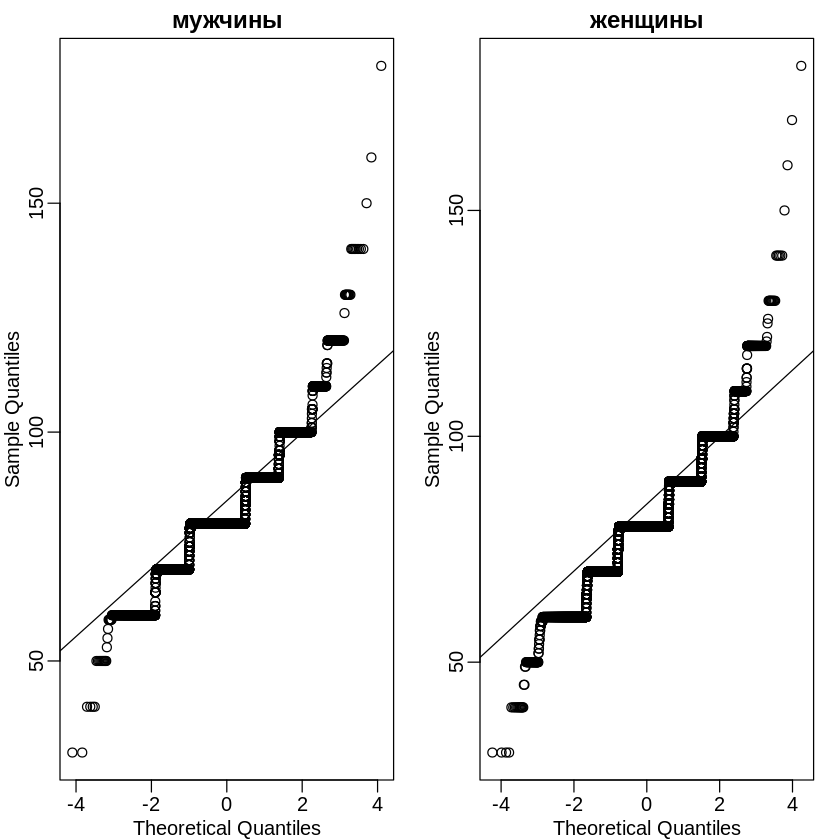

In [33]:
mypar(1,2)
qqnorm(men_, main="мужчины")
qqline(men_)
qqnorm(women_, main="женщины")
qqline(women_)

In [35]:
#считаем статистику для построения ДИ для двух гендеров. Большие объемы выборки, тем точнее оценки с помощью ДИ для ГС
tidy_set_ %>% group_by(gender) %>% summarise(
    mu=mean(ap_lo), #среднее для нижнего давления
    k=qt(0.975, length(ap_lo)-1), #t-критерий
    se=sd(ap_lo)/sqrt(length(ap_lo)), #рассчет SE
    lowlevel=mean(ap_lo)-k*se, #нижняя граница ДИ
    hilevel=mean(ap_lo)+k*se #верхняя граница ДИ
)

gender,mu,k,se,lowlevel,hilevel
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,80.83581,1.960017,0.04501690,80.74758,80.92404
2,82.17558,1.960063,0.06010794,82.05777,82.29340


In [36]:
infer <- tidy_set_ %>% group_by(gender) %>% summarise(
    mu=mean(ap_lo),
    k=qt(0.975, length(ap_lo)-1),
    se=sd(ap_lo)/sqrt(length(ap_lo)),
    lowlevel=mean(ap_lo) - k*se,
    hilevel=mean(ap_lo) + k*se
)
infer

gender,mu,k,se,lowlevel,hilevel
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,80.83581,1.960017,0.04501690,80.74758,80.92404
2,82.17558,1.960063,0.06010794,82.05777,82.29340


In [37]:
ci_w <- c(infer[1, 5], infer[1,6])
ci_w <- as.numeric(c(infer[1,5], infer[-1,6])) #ДИ для женщин
ci_w

[1] 80.74758 82.29340

In [38]:
ci_m <- c(infer[2,5], infer[2,6])
ci_m <- as.numeric(ci_m) #ДИ для мужчин
ci_m

[1] 82.05777 82.29340

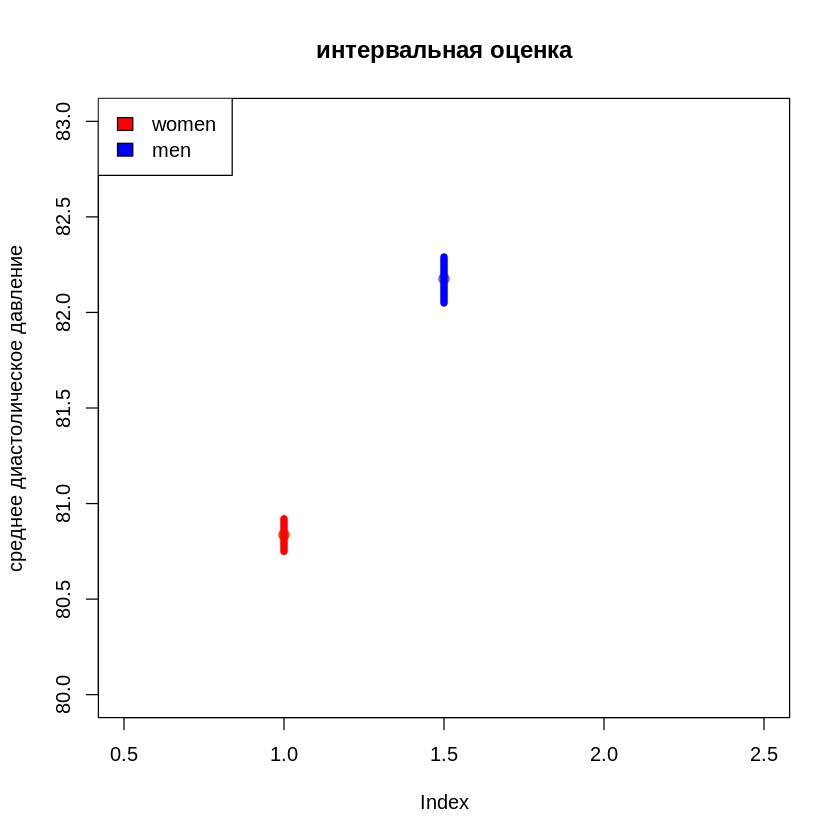

In [44]:
plot(
    mean(women_), col=2, lwd=2, xlim=c(0.5,2.5), ylim=c(80, 83),
    ylab="среднее диастолическое давление", main="интервальная оценка"
)
interval <- c(80.75, 80.92)
lines(x=c(1,1), y=interval, col="red", lwd=6)
points(1.5,mean(men_), col=3, lwd=2)
interval_1 <- c(82.05, 82.29)
lines(x=c(1.5,1.5), y=interval_1, col="blue", lwd=6)
legend("topleft", c("women","men"), fill=c("red","blue"))
#ДИ для мужчин и женщин графически